# So Your Email Has Been Stolen...

We hear a lot about data breaches, about a company exposing our email addresses or IP addresses. We heave a sigh of relief that it was "just" email addresses or IP addresses. Our passwords and financial data wasn't in danger. This project starts off with a very basic form of OSINT: what kind of information can attackers find just starting off with the humble email address?

With all my tables created, I now explore to understand what I can find out about this user.

In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
#read in master file
df = pd.read_csv("maintable.csv")
df.head(5)

,email,ip,latitude,longitude
0,abadisagustin@gmail.com,181.168.120.106,-38.949261,-68.059479
1,Carloselmandril@gmail.com,186.48.125.117,-34.883999,-56.162998
2,cacacasdfa@hotmail.com,186.130.6.73,-34.504719,-58.679520
3,ignaciomortega95@gmail.com,186.18.108.185,-34.687401,-58.563301
4,yerkhomolina1990@gmail.com,181.74.174.95,-33.465000,-70.655998


In [3]:
# read in profile file
social_df = pd.read_csv("data/profiles.csv")
social_df.head(5)

,email,social
0,abadisagustin@gmail.com,pinterest
1,abadisagustin@gmail.com,instagram
2,abadisagustin@gmail.com,spotify
3,ignaciomortega95@gmail.com,pinterest
4,yerkhomolina1990@gmail.com,instagram


In [4]:
# read in pwned file
pwned_df = pd.read_csv("data/pwned.csv")
pwned_df.head(5)

,email,site
0,abadisagustin@gmail.com,8fit
1,troll@hotmail.com,000webhost
2,troll@hotmail.com,500px
3,troll@hotmail.com,AbuseWithUs
4,troll@hotmail.com,Adobe


In [5]:
# read in breaches file
breaches_df = pd.read_csv("data/breaches.csv")
breaches_df.head(5)

,site,BreachDate,Domain,PwnCount,DataClasses
0,000webhost,2015-03-01,000webhost.com,14936670,"['Email addresses', 'IP addresses', 'Names', '..."
1,126,2012-01-01,126.com,6414191,"['Email addresses', 'Passwords']"
2,17Media,2016-04-19,17app.co,4009640,"['Device information', 'Email addresses', 'IP ..."
3,17173,2011-12-28,17173.com,7485802,"['Email addresses', 'Passwords', 'Usernames']"
4,2844Breaches,2018-02-19,NaN,80115532,"['Email addresses', 'Passwords']"


In [6]:
#Get my DataClasses and make another table
all_breaches = breaches_df.to_dict('records')
all_fields =[]
for each in all_breaches:
    print(each)
    cleanup = each['DataClasses'].replace("'","")
    cleanup = cleanup.replace("]","")
    cleanup = cleanup.replace("[","")
    datalist = cleanup.split(",")
    for item in datalist:
        new_row = {
            'site':each['site'],
            'records':each['PwnCount'],
            'stolen':item.strip()
        }
        all_fields.append(new_row)

breaches_detail = pd.DataFrame(all_fields)
breaches_detail.head(20)

{'site': '000webhost', 'BreachDate': '2015-03-01', 'Domain': '000webhost.com', 'PwnCount': 14936670, 'DataClasses': "['Email addresses', 'IP addresses', 'Names', 'Passwords']"}
{'site': '126', 'BreachDate': '2012-01-01', 'Domain': '126.com', 'PwnCount': 6414191, 'DataClasses': "['Email addresses', 'Passwords']"}
{'site': '17Media', 'BreachDate': '2016-04-19', 'Domain': '17app.co', 'PwnCount': 4009640, 'DataClasses': "['Device information', 'Email addresses', 'IP addresses', 'Passwords', 'Usernames']"}
{'site': '17173', 'BreachDate': '2011-12-28', 'Domain': '17173.com', 'PwnCount': 7485802, 'DataClasses': "['Email addresses', 'Passwords', 'Usernames']"}
{'site': '2844Breaches', 'BreachDate': '2018-02-19', 'Domain': nan, 'PwnCount': 80115532, 'DataClasses': "['Email addresses', 'Passwords']"}
{'site': '2fast4u', 'BreachDate': '2017-12-20', 'Domain': '2fast4u.be', 'PwnCount': 17706, 'DataClasses': "['Email addresses', 'Passwords', 'Usernames']"}
{'site': '500px', 'BreachDate': '2018-07-05

,records,site,stolen
0,14936670,000webhost,Email addresses
1,14936670,000webhost,IP addresses
2,14936670,000webhost,Names
3,14936670,000webhost,Passwords
4,6414191,126,Email addresses
5,6414191,126,Passwords
6,4009640,17Media,Device information
7,4009640,17Media,Email addresses
8,4009640,17Media,IP addresses
9,4009640,17Media,Passwords


In [7]:
pwned_details = pd.merge(pwned_df, breaches_detail, on='site')
pwned_details.head(20)

,email,site,records,stolen
0,abadisagustin@gmail.com,8fit,15025407,Email addresses
1,abadisagustin@gmail.com,8fit,15025407,Genders
2,abadisagustin@gmail.com,8fit,15025407,Geographic locations
3,abadisagustin@gmail.com,8fit,15025407,IP addresses
4,abadisagustin@gmail.com,8fit,15025407,Names
5,abadisagustin@gmail.com,8fit,15025407,Passwords
6,tuputamadre@gmail.com,8fit,15025407,Email addresses
7,tuputamadre@gmail.com,8fit,15025407,Genders
8,tuputamadre@gmail.com,8fit,15025407,Geographic locations
9,tuputamadre@gmail.com,8fit,15025407,IP addresses


In [8]:
#rename breaches_df to also site to make it easier to merge
breaches_df = breaches_df.rename({'Names':'site'}, axis='columns')

pwned_breach = pd.merge(pwned_df, breaches_df, on='site')
pwned_breach.head(5)

,email,site,BreachDate,Domain,PwnCount,DataClasses
0,abadisagustin@gmail.com,8fit,2018-07-01,8fit.com,15025407,"['Email addresses', 'Genders', 'Geographic loc..."
1,tuputamadre@gmail.com,8fit,2018-07-01,8fit.com,15025407,"['Email addresses', 'Genders', 'Geographic loc..."
2,agustinlean46@gmail.com,8fit,2018-07-01,8fit.com,15025407,"['Email addresses', 'Genders', 'Geographic loc..."
3,lucassvriz@hotmail.cl,8fit,2018-07-01,8fit.com,15025407,"['Email addresses', 'Genders', 'Geographic loc..."
4,catapv2003@gmail.com,8fit,2018-07-01,8fit.com,15025407,"['Email addresses', 'Genders', 'Geographic loc..."


## All dataframe names to keep them straight

* df : maintable.csv has email address and location

* social_df : profiles.csv has email address and social media

* pwned_df : pwned.csv has email addresses and breached sites

* breaches_df : breaches.csv has breached sites and data, record count

* breaches_detail : elaborates on what was stolen per breach

* pwned_breaches: merged pwned and breaches

* pwned_details : merged pwned with breaches_detail

## Exploring social media profiles

In [9]:
# understanding what the table looks like
social_df.describe()
#punches.merge(codes, left_on='Product_1', right_on='Starting value for format')

,email,social
count,2299,2299
unique,858,22
top,phusuke@gmail.com,twitter
freq,16,613


### Top 10 most active people on social media


In [10]:
social_df.email.value_counts().head(20)

phusuke@gmail.com                  16
leo@gmail.com                      12
Asdad@hotmail.com                   9
asdf@gmail.com                      9
lautaro@gmail.com                   9
aurelien.mazurie@montana.edu        9
troll@hotmail.com                   9
antyplaton@gmail.com                8
kevincho007@gmail.com               8
tmcgrew@purdue.edu                  8
fortrex@gmail.com                   8
caca@gmail.com                      8
mluisacm@gmail.com                  8
geronimo@hotmail.com                7
juan@hotmail.com                    7
matias@hotmail.com                  7
tuputamadre@gmail.com               7
samsmits@gmail.com                  7
blackford.christopher@gmail.com     7
jejeje@hotmail.com                  6
Name: email, dtype: int64

### The most popular social networks

In [11]:
# most popular social network
social_df.social.value_counts().head(10)

twitter       613
instagram     541
spotify       535
pinterest     369
gravatar       40
linkedin       39
facebook       29
google         27
lastfm         23
foursquare     14
Name: social, dtype: int64

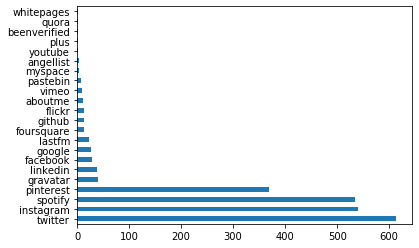

In [15]:
social_df.social.value_counts().plot(kind='barh')

### The median number of social media accounts people have

In [41]:
social_df.email.value_counts().median()

3.0

## Exploring Pwned Data

In [52]:
pwned_df.describe()

,email,site
count,1878,1878
unique,450,217
top,asdf@gmail.com,Taringa
freq,152,123


### Number of breaches a person has been in

The top 15 seem to be clearly fake, but it's still hard to tell when the real ones started. Looks like around 18 or 20--but that's still a lot of data breaches

In [200]:
pwned_df.email.value_counts().head(15)

asdf@gmail.com           152
juan@hotmail.com          83
leo@gmail.com             71
caca@gmail.com            67
Asdad@hotmail.com         66
troll@hotmail.com         58
marco@yahoo.com           45
matias@hotmail.com        41
tuputamadre@gmail.com     38
koala@hotmail.com         33
typeappoige@gmail.com     29
jejeje@hotmail.com        29
geronimo@hotmail.com      26
impemerce@hotmail.com     21
maco@yahoo.com            18
Name: email, dtype: int64

In [201]:
pwned_df.email.value_counts().head(30)

asdf@gmail.com                 152
juan@hotmail.com                83
leo@gmail.com                   71
caca@gmail.com                  67
Asdad@hotmail.com               66
troll@hotmail.com               58
marco@yahoo.com                 45
matias@hotmail.com              41
tuputamadre@gmail.com           38
koala@hotmail.com               33
typeappoige@gmail.com           29
jejeje@hotmail.com              29
geronimo@hotmail.com            26
impemerce@hotmail.com           21
maco@yahoo.com                  18
lautaro@gmail.com               17
boludo@hotmail.com              17
n25ple@gmail.com                17
phusuke@gmail.com               17
zhaofviexs@sina.cn              16
superheroz485@aol.com           15
51c1ac7bd1987@browsechat.eu     13
pepeloco@hotmail.com            13
romanezhuwe@hotmail.com         13
bonyv80@yahoo.fr                11
samsmits@gmail.com              11
fortrex@gmail.com               11
certgroccache@hotmail.com       10
baibronfiphar1970@me

In [202]:
# drop out the 1's
pwned_df.email.value_counts().reset_index(name="count").query("count > 1").median()

count    3.0
dtype: float64

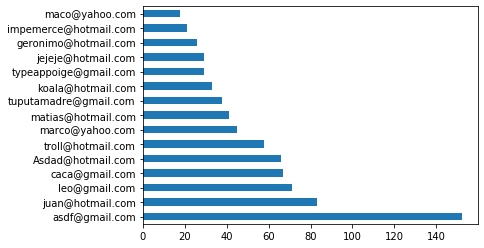

In [17]:
pwned_df.email.value_counts().head(15).plot(kind='barh')

In [203]:
#what's my largest breach?
breaches_df.sort_values(by=['PwnCount'], ascending=False).head(10)

,site,BreachDate,Domain,PwnCount,DataClasses
71,Collection1,2019-01-07,NaN,772904991,"['Email addresses', 'Passwords']"
330,VerificationsIO,2019-02-25,verifications.io,763117241,"['Dates of birth', 'Email addresses', 'Employe..."
242,OnlinerSpambot,2017-08-28,NaN,711477622,"['Email addresses', 'Passwords']"
115,ExploitIn,2016-10-13,NaN,593427119,"['Email addresses', 'Passwords']"
24,AntiPublic,2016-12-16,NaN,457962538,"['Email addresses', 'Passwords']"
277,RiverCityMedia,2017-01-01,rivercitymediaonline.com,393430309,"['Email addresses', 'IP addresses', 'Names', '..."
225,MySpace,2008-07-01,myspace.com,359420698,"['Email addresses', 'Passwords', 'Usernames']"
231,NetEase,2015-10-19,163.com,234842089,"['Email addresses', 'Passwords']"
186,LinkedIn,2012-05-05,linkedin.com,164611595,"['Email addresses', 'Passwords']"
97,Dubsmash,2018-12-01,dubsmash.com,161749950,"['Email addresses', 'Geographic locations', 'N..."


In [188]:
# what breaches are the largest that my people are in?
pwned_breach.groupby(['email','site'])['PwnCount'].max().sort_values(ascending=False)

email                        site            
RBaran@lbl.gov               VerificationsIO     763117241
tuputamadre@gmail.com        VerificationsIO     763117241
romanezhuwe@hotmail.com      VerificationsIO     763117241
leagueoflegends@hotmail.com  VerificationsIO     763117241
dgemperline@wisc.edu         VerificationsIO     763117241
maylogrivas@hotmail.com      VerificationsIO     763117241
beisken@ebi.ac.uk            VerificationsIO     763117241
william.old@colorado.edu     VerificationsIO     763117241
pepeloco@hotmail.com         VerificationsIO     763117241
IK@BDAL.DE                   VerificationsIO     763117241
masilveria@ucdavis.edu       VerificationsIO     763117241
sorete2@yopmail.com          VerificationsIO     763117241
willieppn@hotmail.com        VerificationsIO     763117241
stanislcron@yandex.ru        VerificationsIO     763117241
boludo@hotmail.com           VerificationsIO     763117241
lucas_g@hotmail.com          VerificationsIO     763117241
conchatuma

In [191]:
#May be more interesting to find out how many of my users were in the breaches
pwned_breach.groupby(['site'])['email'].count().sort_values(ascending=False)

site              email                          
VerificationsIO   kuppal2@emory.edu                  763117241
                  lautaro@gmail.com                  763117241
                  pablotkm2019@gmail.com             763117241
                  owen.hoekenga@ars.usda.gov         763117241
                  nt.chigorimbo-tsikiwa@uct.ac.za    763117241
                  nsul124@lasierra.edu               763117241
                  negribj@yahoo.com                  763117241
                  metlin@scripps.edu                 763117241
                  maylogrivas@hotmail.com            763117241
                  matias@hotmail.com                 763117241
                  masilveria@ucdavis.edu             763117241
                  martinuribe@gmail.com              763117241
                  marco@yahoo.com                    763117241
                  maco@yahoo.com                     763117241
                  lukasg@hotmail.com                 763117241
     

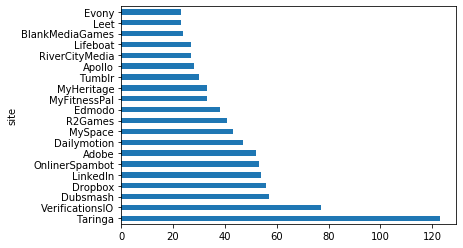

In [19]:
pwned_breach.groupby(['site'])['email'].count().sort_values(ascending=False).head(20).plot(kind='barh')

In [204]:
#May be more interesting to find out how many pieces of data my users lost in the breaches
pwned_details.groupby(['site','email'])['stolen'].count().sort_values(ascending=False)

site            email                          
Exactis         troll@hotmail.com                  20
                fortrex@gmail.com                  20
                maco@yahoo.com                     20
                uschmitt@mineway.de                20
                william.old@colorado.edu           20
                wpathmasiri@rti.org                20
                lukasg@hotmail.com                 20
                leo@gmail.com                      20
                kevincho007@gmail.com              20
                jlgalleg@uci.edu                   20
                gustavojuy26@hotmail.com           20
                ferchu_1967@hotmail.com            20
                marco@yahoo.com                    20
                dzignego@gmail.com                 20
                dayakar@lamar.colostate.edu        20
                chevans@umich.edu                  20
                carmen27@live.com                  20
                bonyv80@yahoo.fr  

In [206]:
# what's the worst piece of data lost?
pwned_details.groupby(['stolen'])['email'].count().sort_values(ascending=False).head(20)

stolen
Email addresses          1877
Passwords                1554
Usernames                1174
IP addresses              802
Names                     587
Phone numbers             313
Geographic locations      302
Dates of birth            300
Physical addresses        239
Genders                   228
Website activity          201
Job titles                168
Employers                 155
Spoken languages           85
Social media profiles      74
Password hints             52
Email messages             33
Purchases                  33
Salutations                32
Marital statuses           30
Name: email, dtype: int64

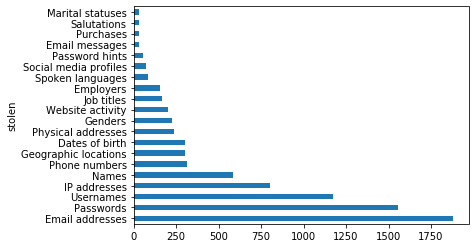

In [20]:
pwned_details.groupby(['stolen'])['email'].count().sort_values(ascending=False).head(20).plot(kind='barh')

In [209]:
# this tells me the largest breach a person was in
# i should probably filter out the mega ones first
pwned_breach.groupby(['email'])['PwnCount'].max().sort_values(ascending=False)

email
pepeloco@hotmail.com               763117241
igor.nikolskiy@wustl.edu           763117241
matias@hotmail.com                 763117241
maylogrivas@hotmail.com            763117241
sorete2@yopmail.com                763117241
jlgalleg@uci.edu                   763117241
jejeje@hotmail.com                 763117241
impemerce@hotmail.com              763117241
ssfas@gmail.com                    763117241
stanislcron@yandex.ru              763117241
randall.garcia@hotmail.com         763117241
metlin@scripps.edu                 763117241
guner@wisc.edu                     763117241
pm_allard@yahoo.fr                 763117241
rg353@georgetown.edu               763117241
geronimo@hotmail.com               763117241
estebanbuenahonda@hotmail.com      763117241
dzignego@gmail.com                 763117241
juan@hotmail.com                   763117241
kevincho007@gmail.com              763117241
koala@hotmail.com                  763117241
kuppal2@emory.edu                  763117241
roma

## Mapping Questions

* Each country's most popular social media

* Countries with the most number of affected victims

* Locations of victims for the largest breach

* Locations where the users lost the most types of data